<a href="https://colab.research.google.com/github/georgicamanea31/linearrp/blob/main/linearrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('TSLA.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


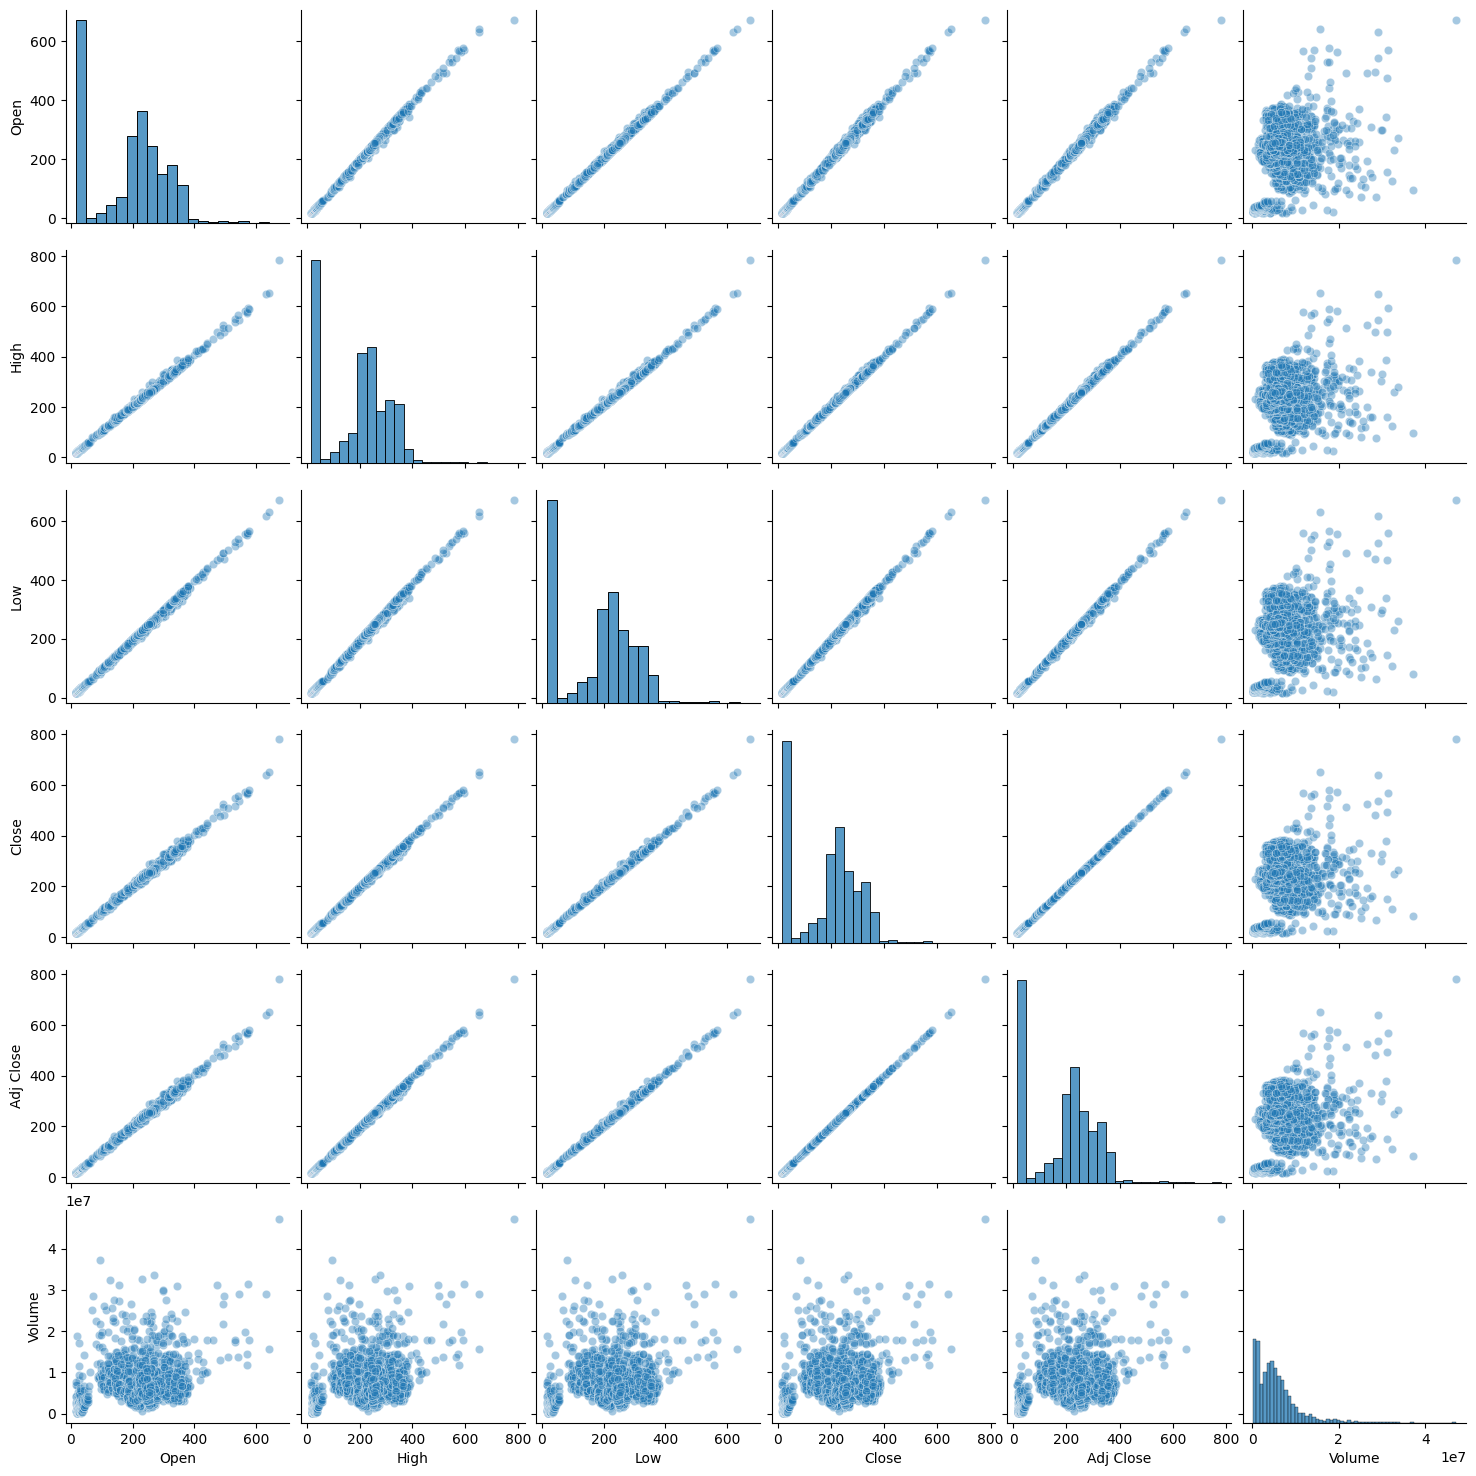

In [ ]:
sns.pairplot(df, kind='scatter',plot_kws={'alpha' : 0.4})

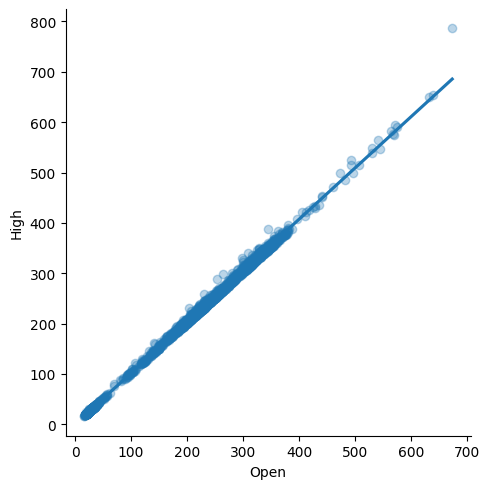

In [ ]:
sns.lmplot(x='Open',
           y='High',
           data=df,
           scatter_kws={'alpha' : 0.3})

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X=df[['Open','Low','Close','Volume']]
Y=df['High']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
cdf = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coef'])
print(cdf)

                Coef
Open    5.726361e-01
Low    -2.980812e-01
Close   7.323114e-01
Volume  2.051430e-07


In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([ 31.92571019,  25.22000813, 283.59471778, 334.63129605,
       261.62299292, 384.02807382,  29.15279208, 210.12705598,
       227.78050771, 326.54878237,  34.69366065, 366.5627265 ,
        27.59058423, 429.39237937, 320.26797594,  31.37038371,
       193.56795832, 236.82300215, 366.86010189, 101.23052653,
       318.62709901, 295.63147682, 221.45021554,  23.2921418 ,
       387.2179149 ,  28.6305861 ,  28.63069041, 215.832896  ,
       241.10416809, 226.8597995 , 259.39796957,  20.96705776,
       263.67266503, 226.56802932, 652.92678616, 214.14017104,
       229.02093048, 217.38571873, 308.42475843,  34.35572691,
       151.12338652, 236.02305827, 317.85012006,  25.3659684 ,
       231.3779797 , 306.8434769 ,  32.84808785, 150.95460042,
       232.19760506,  39.37641958, 227.1036559 ,  33.45601713,
        37.77653405, 365.32121671, 200.31007942,  37.91726007,
        34.07213942, 230.71505024, 234.27218807,  27.79270751,
       297.27731803, 154.46728917,  34.27053026, 347.85

Text(0.5, 0, 'Predicted Values')

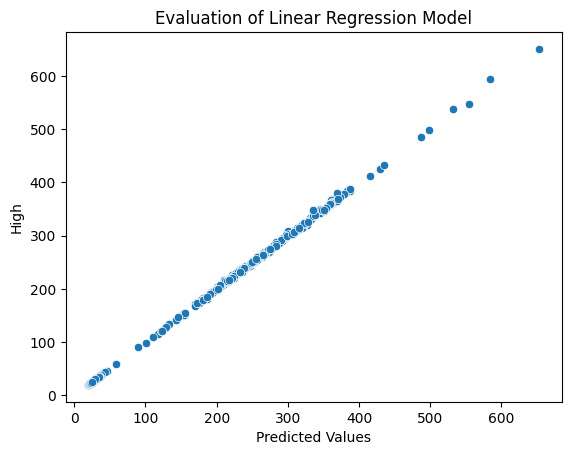

In [ ]:
sns.scatterplot(x=predictions, y=Y_test)
plt.title("Evaluation of Linear Regression Model")
plt.xlabel("Predicted Values")


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
print("Mean Absolute Error: ",mean_absolute_error(Y_test,predictions))
print("Mean Squared Error: ",mean_squared_error(Y_test,predictions))
print("Root Mean Squared Error: ",math.sqrt(mean_squared_error(Y_test,predictions)))


Mean Absolute Error:  1.135559069430098
Mean Squared Error:  3.412078087153489
Root Mean Squared Error:  1.8471811192066383
